In [82]:
using Interact, Luxor, Thebes

In [83]:
include(Pkg.dir() * "/Thebes/src/moreobjects.jl")
moreobjects = [boxcube, boxtorus, concave, cone, cross, cube, cuboctahedron, dodecahedron , geodesic, helix2,
icosahedron, icosidodecahedron, octahedron, octtorus, rhombicosidodecahedron,
rhombicuboctahedron, rhombitruncated_cubeoctahedron, rhombitruncated_icosidodecahedron,
snub_cube, snub_dodecahedron, sphere2, tet3d, tetrahedron, triangle, truncated_cube,
truncated_dodecahedron, truncated_icosahedron, truncated_octahedron, truncated_tetrahedron];

Interact.Options{:SelectionSlider,Float64}(257: "input-114" = 3.1 Float64 , "r1", 3.1, "3.1", 32, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.30000000000000004"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6000000000000001"=>0.6,"0.7000000000000001"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict(4.3=>"4.3",2.0=>"2.0",1.5=>"1.5",6.2=>"6.2",0.2=>"0.2",3.5=>"3.5",5.8=>"5.800000000000001",3.8=>"3.8000000000000003",5.6=>"5.6000000000000005",4.9=>"4.9"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(259: "input-115" = 3.1 Float64 , "r2", 3.1, "3.1", 32, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.30000000000000004"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6000000000000001"=>0.6,"0.7000000000000001"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict(4.3=>"4.3",2.0=>"2.0",1.5=>"1.5",6.2=>"6.2",0.2=>"0.2",3.5=>"3.5",5.8=>"5.800000000000001",3.8=>"3.8000000000000003",5.6=>"5.6000000000000005",4.9=>"4.9"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(261: "input-116" = 3.1 Float64 , "r3", 3.1, "3.1", 32, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.30000000000000004"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6000000000000001"=>0.6,"0.7000000000000001"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict(4.3=>"4.3",2.0=>"2.0",1.5=>"1.5",6.2=>"6.2",0.2=>"0.2",3.5=>"3.5",5.8=>"5.800000000000001",3.8=>"3.8000000000000003",5.6=>"5.6000000000000005",4.9=>"4.9"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(263: "input-117" = 70 Int64 , "s", 70, "70", 31, Interact.OptionDict(DataStructures.OrderedDict("40"=>40,"41"=>41,"42"=>42,"43"=>43,"44"=>44,"45"=>45,"46"=>46,"47"=>47,"48"=>48,"49"=>49…), Dict(68=>"68",89=>"89",46=>"46",85=>"85",55=>"55",42=>"42",66=>"66",58=>"58",59=>"59",74=>"74"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(265: "input-118" = 110 Int64 , "eyex", 110, "110", 10, Interact.OptionDict(DataStructures.OrderedDict("20"=>20,"30"=>30,"40"=>40,"50"=>50,"60"=>60,"70"=>70,"80"=>80,"90"=>90,"100"=>100,"110"=>110…), Dict(200=>"200",100=>"100",50=>"50",80=>"80",40=>"40",140=>"140",190=>"190",160=>"160",170=>"170",60=>"60"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(267: "input-119" = 160 Int64 , "eyey", 160, "160", 15, Interact.OptionDict(DataStructures.OrderedDict("20"=>20,"30"=>30,"40"=>40,"50"=>50,"60"=>60,"70"=>70,"80"=>80,"90"=>90,"100"=>100,"110"=>110…), Dict(200=>"200",100=>"100",50=>"50",80=>"80",40=>"40",140=>"140",190=>"190",210=>"210",160=>"160",170=>"170"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(269: "input-120" = 160 Int64 , "eyez", 160, "160", 15, Interact.OptionDict(DataStructures.OrderedDict("20"=>20,"30"=>30,"40"=>40,"50"=>50,"60"=>60,"70"=>70,"80"=>80,"90"=>90,"100"=>100,"110"=>110…), Dict(200=>"200",100=>"100",50=>"50",80=>"80",40=>"40",140=>"140",190=>"190",210=>"210",160=>"160",170=>"170"…)), Any[], Any[], true, "horizontal", true)

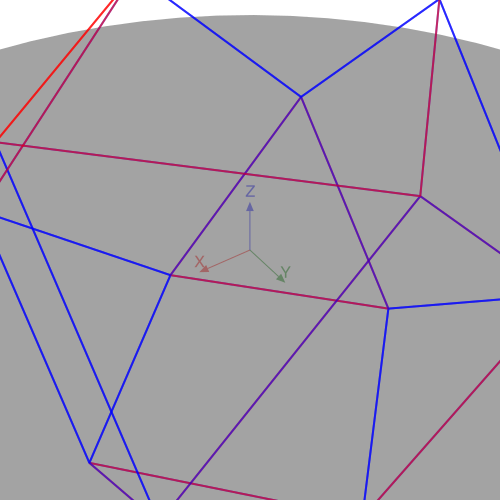

In [84]:
myrenderfunction(vertices, faces, labels, cols) = begin
    Thebes.simplerender(vertices, faces, labels, cols, action=:stroke)
end

@manipulate for r1 in 0:0.1:2pi, r2 in 0:0.1:2pi, r3 in 0:.1:2pi, s in 40:100, eyex in 20:10:200,  eyey = 20:10:300,  eyez = 20:10:300
    d = Drawing(500, 500, :svg)
    origin()
    setopacity(0.6)
    camerapoint = Point3D(0, 0, 450)
    eyepoint    = Point3D(eyex, eyey, eyez)
    centerpoint = Point3D(0, 0, 0)
    uppoint     = Point3D(0, 0, 1) # relative to centerpoint
    newproj     = newprojection(eyepoint, centerpoint, uppoint, 750)
    object = make(moreobjects[7])
    draw3daxes(20,   newproj)
    sethue("grey40")
    drawcarpet(200,  newproj)
    changescale!(object, s, s, s)
    rotateto!(object, r1, r2, r3)
    sortfaces!(object)
    drawmodel(object, newproj, cols=["blue", "red", "green"], renderfunction= myrenderfunction)
    finish()
    d
end